In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
X = dataset.iloc[:, 0:13].values # X must be a matrix
y = dataset.iloc[:, 13].values # y must be a vector

In [3]:
# Splitting into training and test sets
# Use for larger data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [4]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Applying LDA
# n_components is number of linear discriminant components
# looking for two linear discriminants so choose 2
# lda is supervised so we need to put y_train into fit_transform for X_train
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [6]:
# Fitting Classfier to the dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\barbe\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\barbe\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# predicting the new result with regression
y_pred = classifier.predict(X_test)

In [8]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [9]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [10]:
X_test

array([[-3.83960313,  1.54567265],
       [ 5.24601727,  1.72358501],
       [-0.66064228, -3.32231072],
       [-2.16667061,  1.0147427 ],
       [-0.16079996, -1.27171643],
       [-5.31374258, -2.22014536],
       [-4.78386714,  3.11508054],
       [ 5.55863966,  0.88556084],
       [-1.29772139, -2.40714074],
       [ 0.53068371, -2.37759837],
       [ 2.36900593,  1.81859204],
       [ 5.14502202,  1.88061526],
       [-5.27947032,  3.32510044],
       [-2.70452577, -2.61522323],
       [ 4.32314426,  2.14569837],
       [-0.65835601, -4.67751669],
       [-4.07332713,  1.95266123],
       [-6.55291385,  4.01098911],
       [ 2.40020179, -1.14618328],
       [-5.14219986,  2.02120623],
       [-2.46475469, -2.81225673],
       [-2.5190649 ,  1.07965428],
       [-1.79798575,  0.47987658],
       [-1.43423986, -2.41298601],
       [ 1.11433225, -0.98310413],
       [ 0.28604133, -2.81262488],
       [-1.21198193, -2.73115246],
       [ 0.84900431, -3.34996047],
       [-1.03105294,

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


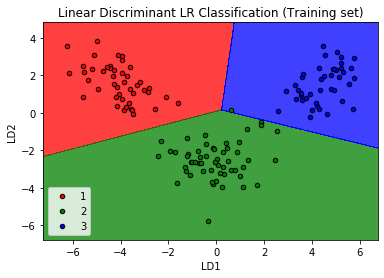

In [15]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = .75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = "black", s = 20)
plt.title("Linear Discriminant LR Classification (Training set)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


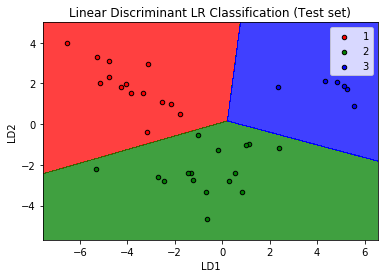

In [16]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = .75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = "black", s = 20)
plt.title("Linear Discriminant LR Classification (Test set)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()